In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
plt.style.use('ggplot')

import nltk

df = pd.read_csv(r'E:\ML Learning\PROJECT_SENTIMENT_ANALYSIS_WHITE_HOUSE\whiteHouseBriefing\whiteHouseBriefing\data.csv')

In [5]:
#Read in data
print(df.shape)

(10744, 5)


In [6]:

df.head()
df2 = df 

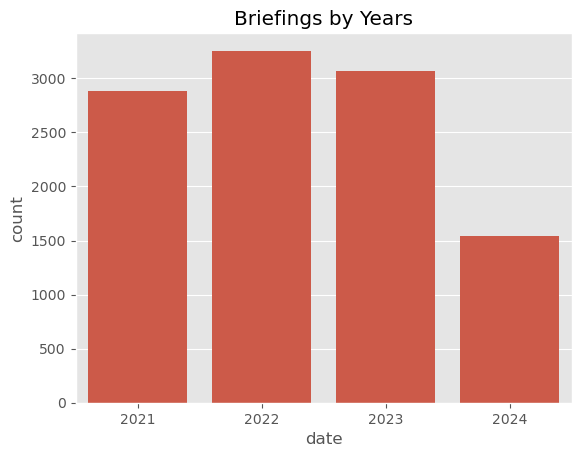

In [7]:
#EDA : Briefings by Years
df['date'] = pd.to_datetime(df2['date'] )
year = df2['date'].dt.year
df2['date'] = pd.to_datetime(df2['date'])
ax = sns.countplot(data=df2, x = year)
ax.set_title("Briefings by Years")

plt.show()



In [8]:
#EDA : Briefings by Quarter for each years

df2['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [210]:

# 31      NaN
# 4623    NaN
# 6871    NaN
# 7667    NaN
# Name: content, dtype: object


# Convert everything to string, replace NaN with empty string
df2['content'] = df['content'].fillna('').astype(str)

# Remove any leading/trailing whitespace
df2['content'] = df['content'].str.strip()

# Optionally, remove empty strings
df2 = df2[df2['content'] != '']
non_string = df2['content'].apply(lambda x: not isinstance(x, str))
if non_string.any():
    print("Non-string data found:")
    print(df.loc[non_string, 'content'].head())
    #Non-string data found:
df2

,briefing_type,content,date,title,url,quarter
0,Statements and Releases,"President Joseph R. Biden, Jr. spoke today wit...",2024-07-02,Readout of President Joe Biden’s Call with Pre...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
1,Press Briefings,1:50 P.M. EDTMS. JEAN-PIERRE: Hi. Good afterno...,2024-07-03,Press Briefing by Press Secretary Karine Jean-...,https://www.whitehouse.gov/briefing-room/press...,2024Q3
2,Statements and Releases,President Biden spoke this morning with Prime ...,2024-07-04,Readout of President Joe Biden’s Call with Pri...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
3,Speeches and Remarks,"The South LawnReverend Lee, the President and ...",2024-07-04,Remarks as Prepared for Delivery by First Lady...,https://www.whitehouse.gov/briefing-room/speec...,2024Q3
4,Statements and Releases,"With today’s report that 206,000 jobs were cre...",2024-07-05,Statement from President Joe Biden on the June...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
...,...,...,...,...,...,...
10739,Statements and Releases,President Biden and Vice President Harris are ...,2024-06-26,Biden-⁠Harris Administration Announces the App...,https://www.whitehouse.gov/briefing-room/state...,2024Q2
10740,Statements and Releases,"– Today, Vice President Harris announced the r...",2024-06-26,FACT SHEET: Vice President Harris Announces Fi...,https://www.whitehouse.gov/briefing-room/state...,2024Q2
10741,Presidential Actions,Our Nation has made tremendous progress in adv...,2024-06-26,A Proclamation on Granting Pardon for Certain ...,https://www.whitehouse.gov/briefing-room/presi...,2024Q2
10742,Statements and Releases,Every person in America should be able to acce...,2024-06-26,Statement from Vice President Kamala Harris on...,https://www.whitehouse.gov/briefing-room/state...,2024Q2


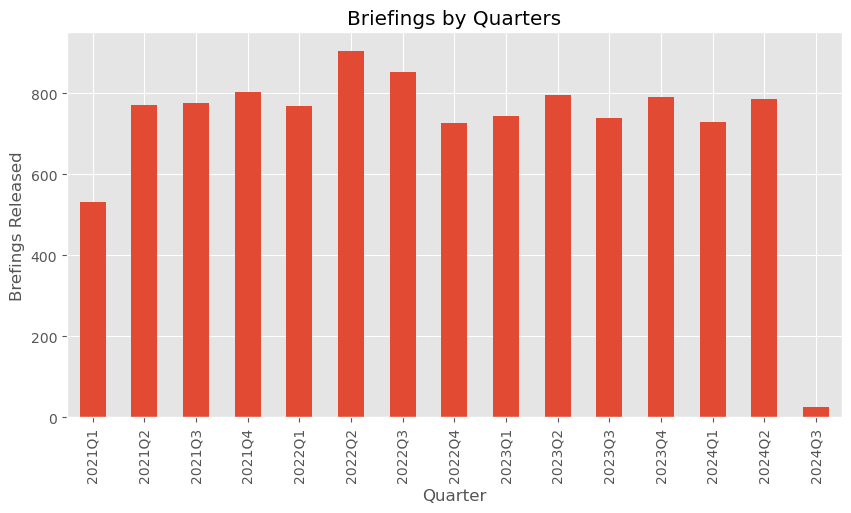

In [10]:
#EDA : Briefings by Quarters
ax = df2['quarter'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Briefings by Quarters',
          figsize=(10,5))
ax.set_xlabel('Quarter')
ax.set_ylabel('Brefings Released')
plt.show()

In [124]:
#IMPORTING PIPELINE
import torch
from transformers import RobertaTokenizerFast, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
from tqdm import tqdm


In [201]:
# MODEL = f'distilbert/distilbert-base-uncased-finetuned-sst-2-english'
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)

#choosing the model


# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL).to('cuda:0')

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizerFast.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to('cuda:0')




In [207]:
#test function

example = "With today’s report that 206,000 jobs were created last month, a record 15.7 million jobs have been created during my Administration. We have more work to do, but wages are growing faster than prices and more Americans are joining the workforce, with the highest share of working-age Americans in the workforce in over 20 years. That’s real progress for hardworking families who have the dignity and respect that comes with earning a paycheck and putting food on the table.Too many Americans are still feeling squeezed by the cost of the living. I’m fighting to lower costs by taking on corporate price gouging, capping the cost of insulin and prescription drugs, and calling on Congress to lower rent by building 2 million new homes. Congressional Republicans have a different vision that sides with billionaires and special interests and will supercharge inflation. They’ll impose high consumer tariffs that will cost middle class families thousands of dollars each year, give a giant tax cut to the wealthy, repeal the Affordable Care Act, and allow big corporations to keep ripping off Americans. While they fight for Park Avenue, I’ll keep fighting for working families like the ones I grew up with in Scranton.###"
# encoded_text = tokenizer.encode_plus(example,max_length=512, truncation= True,padding='max_length',return_tensors='pt').to('cuda:0')
# output = model(**encoded_text)
# scores = output[0][0].detach().cpu().numpy()
# scores = softmax(scores)
# scores_dict = {
#     'roberta_neg' : scores[0],
#     'roberta_neu' : scores[1],
#     'roberta_pos' : scores[2]
# }
# print(scores_dict)

encoded_text = tokenizer(example, max_length=512, truncation=True, padding='max_length', return_tensors='pt').to('cuda:0')
output = model(**encoded_text)
scores = output[0][0].detach().cpu().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.15175463, 'roberta_neu': 0.45669144, 'roberta_pos': 0.3915539}


In [208]:


# def polarity_scores_roberta(stuff):
#     encoded_text = tokenizer(stuff,max_length=512, truncation= True,padding='max_length', return_tensors='pt').to('cuda:0')
#     output = model(**encoded_text)
#     scores = output[0][0].detach().cpu().numpy()
#     scores = softmax(scores)
#     scores_dict = {
#         'roberta_neg' : scores[0],
#         'roberta_neu' : scores[1],
#         'roberta_pos' : scores[2]
#     }
#     return scores_dict

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, max_length=512, truncation=True, padding='max_length', return_tensors='pt').to('cuda:0')
    output = model(**encoded_text)
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [211]:


res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        content = row['content']
        date = row['date']
        roberta_result = polarity_scores_roberta(content)
        res[content] = roberta_result
    except RuntimeError:
        print(f'Broke for id {date}')



100%|██████████| 10740/10740 [07:31<00:00, 23.80it/s]


In [212]:


results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'date'})
results_df = results_df.merge(df, how='left')



In [213]:
results_df

,date,roberta_neg,roberta_neu,roberta_pos,briefing_type,content,title,url,quarter
0,2024-07-02,0.119879,0.531995,0.348126,Statements and Releases,"President Joseph R. Biden, Jr. spoke today wit...",Readout of President Joe Biden’s Call with Pre...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
1,2024-07-02,0.119879,0.531995,0.348126,Speeches and Remarks,"Private ResidenceMcLean, Virginia6:09 P.M. EDT...",Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...,2024Q3
2,2024-07-02,0.119879,0.531995,0.348126,Press Briefings,"2:45 P.M. EDTMS. JEAN-PIERRE: Oh, full house.Q...",Press Briefing by Press Secretary Karine Jean-...,https://www.whitehouse.gov/briefing-room/press...,2024Q3
3,2024-07-02,0.119879,0.531995,0.348126,Statements and Releases,"Today, the Biden-Harris Administration will an...",Fact Sheet: Biden-⁠Harris Administration Annou...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
4,2024-07-02,0.119879,0.531995,0.348126,Speeches and Remarks,"D.C. Emergency Operations CenterWashington, D....",Remarks by President Biden on Extreme Weather,https://www.whitehouse.gov/briefing-room/speec...,2024Q3
...,...,...,...,...,...,...,...,...,...
10739,2024-06-28,0.307943,0.559483,0.132575,Speeches and Remarks,"Jim Graham BuildingRaleigh, North Carolina1:16...",Remarks by President Biden at a Campaign Event...,https://www.whitehouse.gov/briefing-room/speec...,2024Q2
10740,2024-06-28,0.307943,0.559483,0.132575,Speeches and Remarks,"East Las Vegas Community CenterLas Vegas, Neva...",Remarks by Vice President Harris at a Campaign...,https://www.whitehouse.gov/briefing-room/speec...,2024Q2
10741,2024-06-28,0.307943,0.559483,0.132575,Presidential Actions,"Today, President Joseph R. Biden, Jr. declared...","President Joseph R. Biden, Jr. Approves Minnes...",https://www.whitehouse.gov/briefing-room/presi...,2024Q2
10742,2024-06-28,0.307943,0.559483,0.132575,Presidential Actions,Presidential DeterminationNo.2024-06MEMORANDUM...,Memorandum on Presidential Determination and C...,https://www.whitehouse.gov/briefing-room/presi...,2024Q2


In [214]:
results_df.to_csv('roberta_scored_briefings.csv', index = False, sep=',')

0        President Joseph R. Biden, Jr. spoke today wit...
1        1:50 P.M. EDTMS. JEAN-PIERRE: Hi. Good afterno...
2        President Biden spoke this morning with Prime ...
3        The South LawnReverend Lee, the President and ...
4        With today’s report that 206,000 jobs were cre...
                               ...                        
10739    President Biden and Vice President Harris are ...
10740    – Today, Vice President Harris announced the r...
10741    Our Nation has made tremendous progress in adv...
10742    Every person in America should be able to acce...
10743    National Security Advisor to the Vice Presiden...
Name: content, Length: 10744, dtype: object